# Car Sales dataset


### 1. Problem Statement: 

### 1.1 Introduction

This is a dataset which talks about the car sales advertisement data collected in Ukraine. We need to make some analysis on this dataset so that we can draw some useful inferences.


### 2. Load the packages and data 

#### Importing the packages

In [21]:
#import sys
#!{sys.executable} -m pip install pandas-profiling

import numpy as np                                                 
import pandas as pd                                               
import pandas_profiling
import matplotlib.pyplot as plt                                    
import seaborn as sns                                              
%matplotlib inline
sns.set()

from subprocess import check_output


#### Importing the dataset

In [22]:
url ="https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv"
carsales= pd.read_csv(url,encoding='ISO-8859-1')
carsales.head(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


### 3. Data Profiling

Basic understanding of this data set

In [3]:
carsales.shape

(9576, 10)

This shows that our data has 9576 rows and 10 columns.

In [4]:
carsales.head(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [4]:
carsales.dtypes

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

In [6]:
carsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [7]:
carsales.describe(include = 'all')   

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [8]:
carsales.isna().sum()


car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

From the above we see that engV and drive has null values

### 3.1 Pre-Profiling

In [5]:
profile = pandas_profiling.ProfileReport(carsales)
profile.to_file(outputfile="carsales_before_preprocessing.html")

#### Initial observations:

1. Summary of data types in this data set:
        Numerical: price,mileage,engV,year
        Object: all the remaining
       
2. Drive has missign values. 
3. engV has missing values and extreme values. 
4. Mileage has outliers and zeroes.
5. Price has 0's .

#### Treatment of missing values and outliers

Fill in missing values for drive column.
Replace the missing values with mode.

In [23]:
mode_drive = carsales.drive.mode()[0]
#print (mode_drive)
#print(carsales[carsales['drive'].isna()])
carsales['drive'].fillna(mode_drive, inplace = True)
print(carsales[carsales['drive']=='front'])


                car      price       body  mileage  engV engType registration  \
3     Mercedes-Benz  17800.000        van      162   1.8  Diesel          yes   
4     Mercedes-Benz  33000.000      vagon       91   NaN   Other          yes   
6             Honda   6500.000      sedan      199   2.0  Petrol          yes   
7           Renault  10500.000      vagon      185   1.5  Diesel          yes   
10           Nissan  20447.154  crossover        0   1.2  Petrol          yes   
30           Nissan  13980.000      hatch       31   NaN   Other          yes   
31           Nissan  17300.000      hatch       24   NaN   Other          yes   
32       Volkswagen  10700.000      sedan      147   2.0  Petrol          yes   
33             Audi   2600.000      vagon      273   2.5  Diesel           no   
34         Chrysler  13700.000      sedan       70   2.4  Petrol          yes   
35       Volkswagen   8999.000      sedan      120   2.0  Petrol          yes   
37             Audi   2850.0

  Dealing with missing values and extreme values of engV

In [24]:
#find out the extreme values in engV

#replace extreme values with median value
engv_median=carsales.engV.median()
print (engv_median)
carsales['engV']=carsales['engV'].mask(carsales['engV']>=9,engv_median)
print(carsales[carsales['engV']>=9])




2.0
Empty DataFrame
Columns: [car, price, body, mileage, engV, engType, registration, year, model, drive]
Index: []


In [25]:
#fill missing values of engV with median
#carsales[carsales['engV'].isna()]
carsales['engV'].fillna(engv_median, inplace = True)
#  print(carsales[carsales['engV'].isna()])

In [27]:
print(carsales[carsales['engV'].isna()])  #to check if there are any null

Empty DataFrame
Columns: [car, price, body, mileage, engV, engType, registration, year, model, drive]
Index: []


Mileage has outliers and zeroes.

Find the mean of mileage based on engType and replace the outliers with respective means.


In [10]:
cs= carsales[(carsales['mileage']>=10) & (carsales['mileage']<=600)]
cs_d= round(cs[cs['engType']=='Diesel']['mileage'].mean(),2)
cs_p= round(cs[cs['engType']=='Petrol']['mileage'].mean(),2)
cs_g= round(cs[cs['engType']=='Gas']['mileage'].mean(),2)
cs_o= round(cs[cs['engType']=='Other']['mileage'].mean(),2)

In [15]:
#carsales[(carsales['mileage']<=10) | (carsales['mileage']>=600)]

In [28]:
carsales['mileage']= carsales['mileage'].mask(((carsales['mileage']<=10)&(carsales['engType']=='Diesel')) | ((carsales['mileage']>=600)&(carsales['engType']=='Diesel')),cs_d)
carsales['mileage']= carsales['mileage'].mask(((carsales['mileage']<=10)&(carsales['engType']=='Petrol')) | ((carsales['mileage']>=600)&(carsales['engType']=='Petrol')),cs_p)
carsales['mileage']= carsales['mileage'].mask(((carsales['mileage']<=10)&(carsales['engType']=='Gas')) | ((carsales['mileage']>=600)&(carsales['engType']=='Gas')),cs_g)
carsales['mileage']= carsales['mileage'].mask(((carsales['mileage']<=10)&(carsales['engType']=='Other')) | ((carsales['mileage']>=600)&(carsales['engType']=='Other')),cs_o)


In [29]:
carsales[(carsales['mileage']<=10) | (carsales['mileage']>=600)]

,car,price,body,mileage,engV,engType,registration,year,model,drive


The count of records with Price has 0's as less as 2.8 % ,so we shall delete those records.

In [30]:
carsales=carsales[ (carsales['price']!=0) ]
carsales.shape


(9309, 10)

In [15]:
carsales.shape

(9309, 10)

Remove any duplicate data from the data set


In [31]:
carsales
carsales=carsales.drop_duplicates()
print(carsales.count())

car             9218
price           9218
body            9218
mileage         9218
engV            9218
engType         9218
registration    9218
year            9218
model           9218
drive           9218
dtype: int64


### 3.2 Post Pandas Profiling

In [17]:
profile = pandas_profiling.ProfileReport(carsales)
profile.to_file(outputfile="carsales_after_preprocessing.html")

### 3.3 __Adding a new column__

__Age column__

We shall add a new column named as __age__ which determines the age of the car based on its year of manufacture.


In [32]:
print(carsales.shape)

import datetime

now = datetime.datetime.now()
cur_date= now.year

carsales['age'] = cur_date-carsales['year']
print(carsales.shape)
#print (carsales.head(20))

(9218, 10)
(9218, 11)


### 3.4 Hypothesis:  
Price of the cars can be affected by drive type, engine type , age and body type of the cars.

### 4. Identifying patterns

#### 4.1 Relationship between age of the car and price

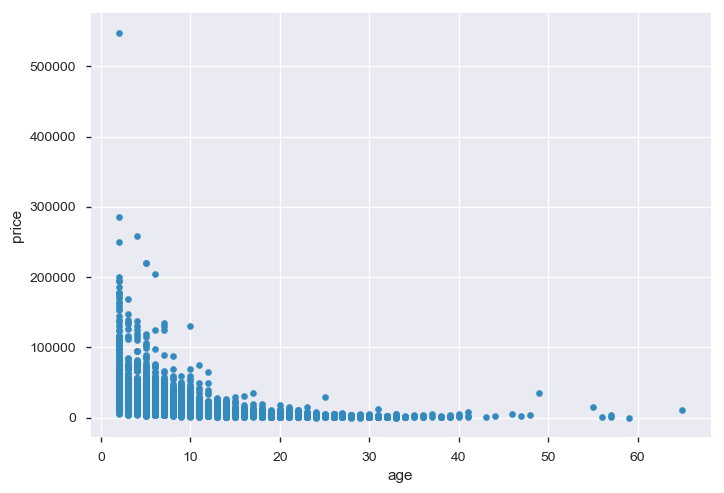

In [23]:
carsales[(carsales['year']>=1950) ].sample(5000).plot.scatter(x='age', y='price')

D:\Madhavi\learn\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


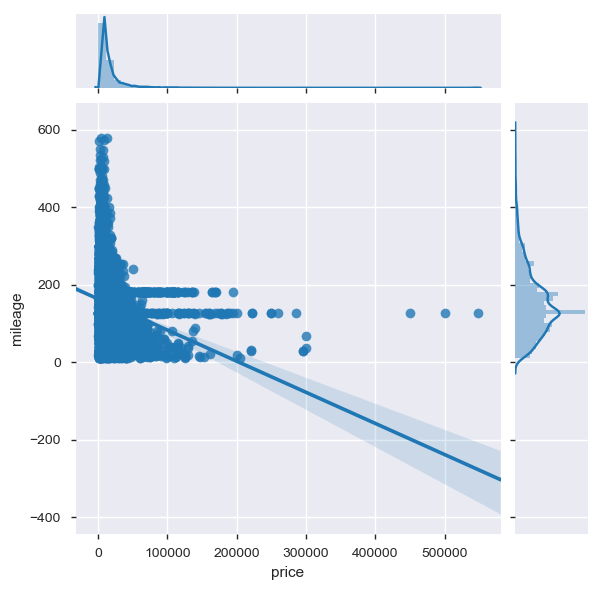

In [24]:
sns.jointplot(x='price', y='mileage',data= carsales,kind='reg')

__Observations__: The above graph explains that some cars that were bought in the recent times were sold at higher prices. However, there are some exceptions to this, as some cars brought in the recent times were also sold at comparitively cheaper price. I feel this could be depended on other factors too.

#### 4.2 Price vs mileage

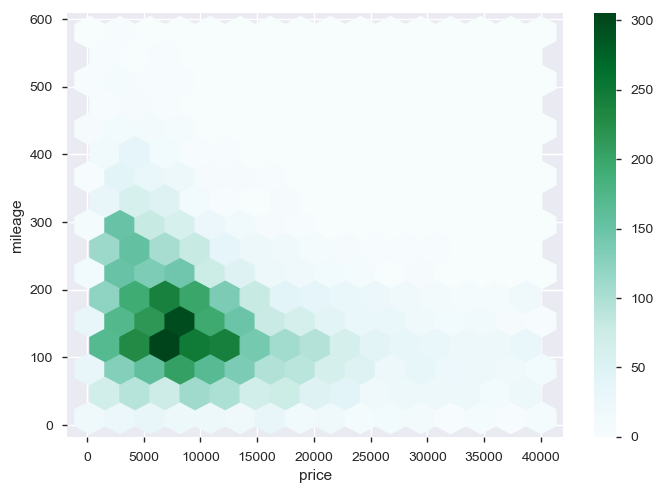

In [28]:
carsales[(carsales['price']<=40000)].plot.hexbin(x='price', y='mileage', gridsize=15)


__Observations__: Most the the vehicles sold are the range of 5000-15000 and the mileage range of 80 -200.


From the above plot we understand that , there is weak correlation between mileage and price .When the cars have higher range of mileage , they are sold at lesser prices.

#### 4.3  Mileage distribution over engTypes

D:\Madhavi\learn\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'mileage distribution of 3 engine types')

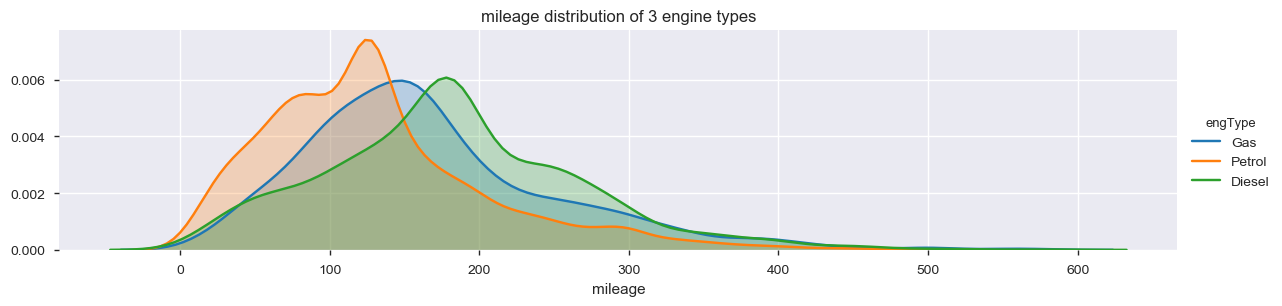

In [30]:
cs = (carsales
         .loc[carsales['engType'].isin(['Petrol', 'Diesel','Gas'])]
         #.loc[:, ['Value', 'Overall', 'Aggression', 'Position']]
    ).sample(5000)
as_fig = sns.FacetGrid(cs,hue='engType',aspect=4)

as_fig.map(sns.kdeplot,'mileage',shade=True)

#oldest = titanic_data['Age'].max()

#as_fig.set(xlim=(0,oldest))

as_fig.add_legend()
plt.title('mileage distribution of 3 engine types')

__Observations__: Diesel mileage looks more normal as compared to Petrol an dGas which are skewed. We can say that Diesel  variants have a higher mileage when compared to Gas and Petrol variants.

#### 4.4  Prices when compared to Drive types

D:\Madhavi\learn\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


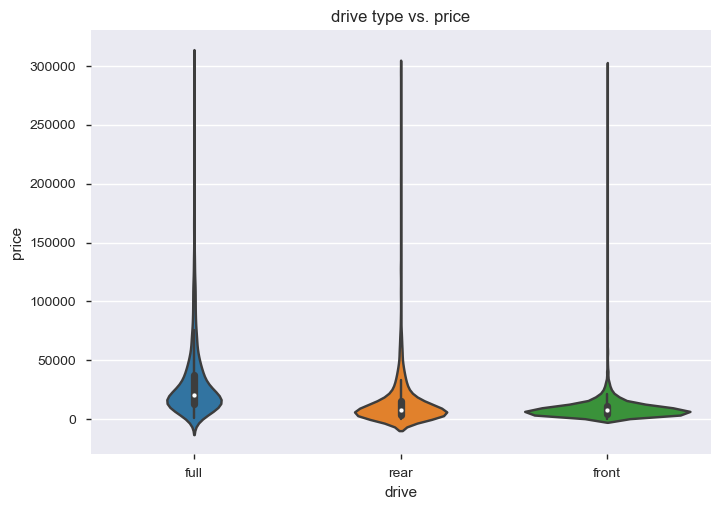

In [31]:
cs=carsales[carsales['price']<=300000]
sns.violinplot('drive','price', kind='point', data = cs)#cs)
plt.title('drive type vs. price')

plt.show()

__Observations__: From the above we can say that front wheel cars have a lower price range as compared to rear wheel and full wheel drive.

#### 4.5  Relationship between prices and engine type

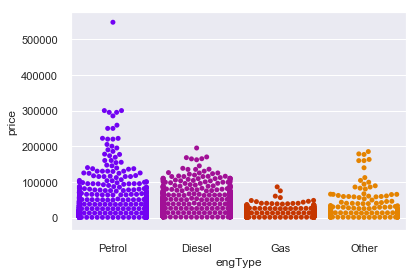

In [47]:
sns.swarmplot(x="engType", y="price", palette="gnuplot", data=carsales.sample(8000))

__Observations__:Petrol cars are sold at a higher prices than that of diesel and gas engine cars

#### 4.6  Relationship between registration and year

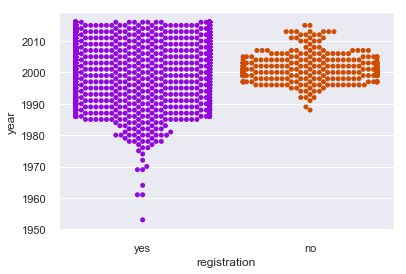

In [49]:
sns.swarmplot(x="registration", y="year", palette="gnuplot", data=carsales.sample(5000))

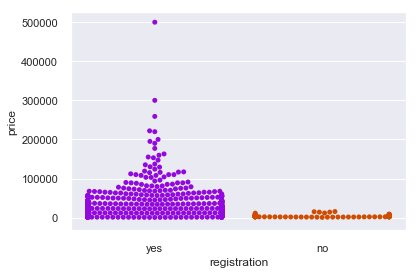

In [44]:
sns.swarmplot(x="registration", y="price", palette="gnuplot", data=carsales.sample(2000))

__Observation:__ Most of the cars have been registered , wereas there are few cars which did not get registration done.

#### 4.7 Mileage given as compared to age of cars

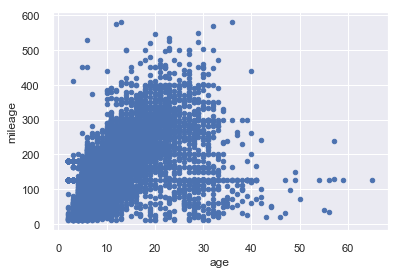

In [45]:
carsales[(carsales['year']>=1950) ].plot.scatter(x='age', y='mileage')#,gridsize=20)

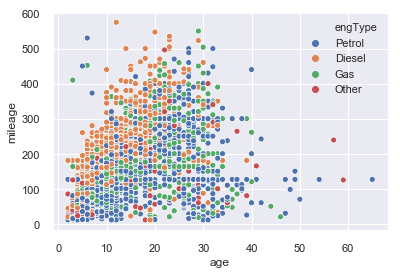

In [46]:
sns.scatterplot(x="age", y="mileage", hue= 'engType',data=carsales.sample(6500))

__Observations__: Although the milegae range is high as seen in the scatterplot,we may infer that as age of the car increases its mileage is also increasing.

#### 4.8 Prices as compared to body of cars

D:\Madhavi\learn\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


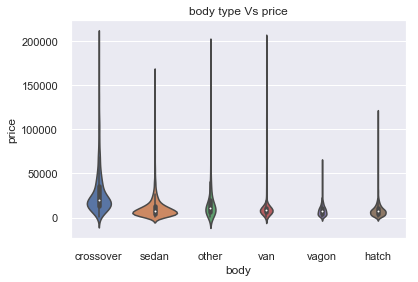

In [43]:
cs=carsales[carsales['price']<=200000]
sns.violinplot('body','price', kind='point', scale= 'count',data = cs)#cs)
plt.title('body type Vs price')

plt.show()

__Observations__: Price ranges are mostly the same for all the body type models of cars. Since we have scaled by count, we can see that sedans and crossovers have large count in terms of cars sold.

#### 4.9. EngV vs drive type

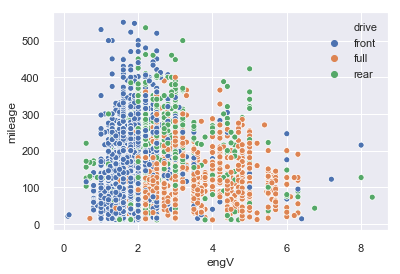

In [48]:
#carsales[(carsales['year']>=1950) ].sample(8000).plot.scatter(x='mileage', y='engV',palatte ='drive')#,gridsize=20)
sns.scatterplot(x="engV", y="mileage", hue= 'drive',data=carsales.sample(5500))


### 5. Analysis through questions

#### 5.1. What is the sales trend of cars

#### 5.1.1. What is the Sales count of the cars based on the year of manufacture?

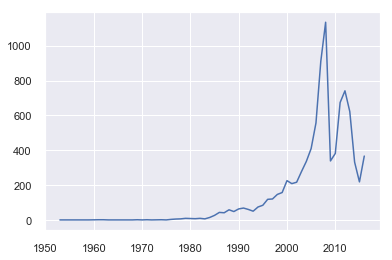

In [33]:
carsales['year'].value_counts().sort_index().plot.line()

Here, we see that there has been gradual increase in the sales till year 2008 cars where it reaches its peak. Which means that, 2008 cars are the most sold ones.
Then there is a sudden drop in the sales in the number of cars that belong to the next consecutive year 2009.
The sales reached to a high in 2012 cars.



#### 5.1.2. What is the Sales of the cars based on the price range?

Text(0.5,1,'Number of cars sold wrt to price range')

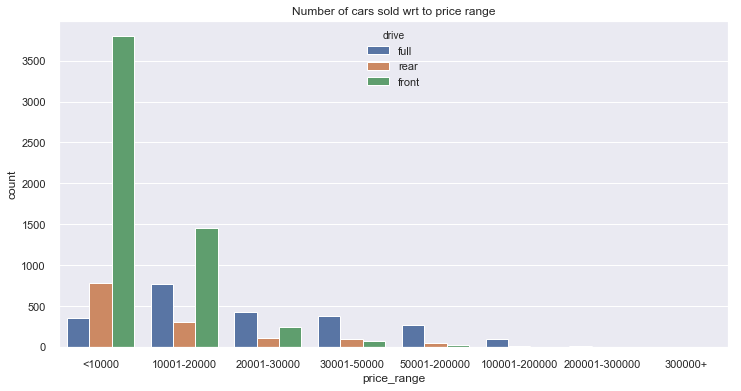

In [34]:
#How does sales vary with price.

carsales['price_range'] = pd.cut(carsales['price'].dropna(),
                         [0,10000,20000,30000,50000,100000,200000,300000,500000],
                         labels=['<10000','10001-20000','20001-30000','30001-50000','50001-200000','100001-200000','200001-300000','300000+'], include_lowest=True)
fig,ax =plt.subplots(figsize=(12,6))
sns.countplot(data = carsales,x = 'price_range', hue='drive')#'body')
#sns.countplot(data = carsales,x = 'price_range')#, hue='drive')#'body')
plt.title('Number of cars sold wrt to price range')

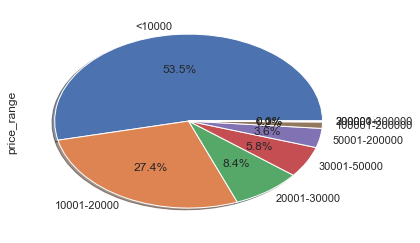

In [36]:
#f,ax = plt.subplots(1,4,figsize=(22,7))
carsales['price_range'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

#ax[0].set_title('Sales based on price range')

53.5% of the cars sold are in the price range of <10000 . Also we can see that sales count is decreasing with the increase in price.

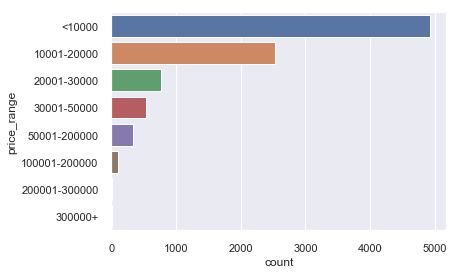

In [37]:
sns.countplot(data = carsales,y = 'price_range')

Prices spread is highly skewed. From the above plot, we can infer that, the cars that are sold at price less than 10000 are the ones that are sold the most. Also the number of cars that get sold decreases as the price range increases.
We can say that sales does get affected with the pricing.

D:\Madhavi\learn\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


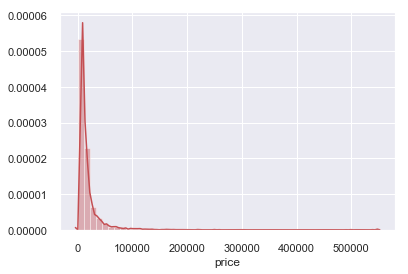

In [38]:
sns.distplot(carsales.price, color="r")#, ax=axes[0, 0])

#### 5.1.3. What is the Sales of the cars based on the body type?

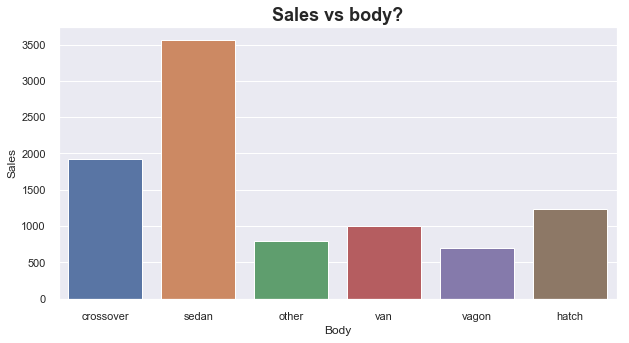

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x="body", data=carsales)
plt.title(" Sales vs body? ",fontsize=18,fontweight="bold")
plt.ylabel("Sales")
plt.xlabel("Body")
plt.show()


__Observation__: From the above plot we can infer that, sedan models are the most sold cars, follwed by crossovers, hatchbacks, van, and others

#### 5.1.4. What is the sales count based on car body and engine type?

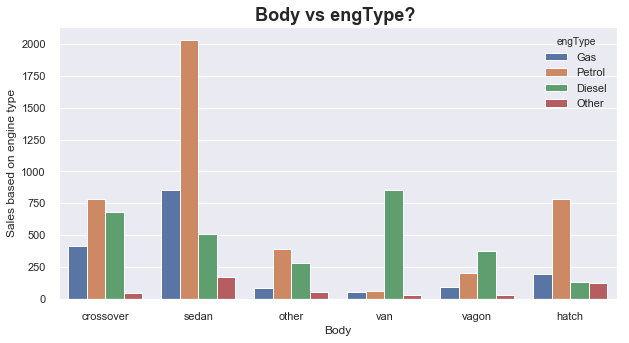

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x="body", hue="engType", data=carsales)
plt.title("Body vs engType? ",fontsize=18,fontweight="bold")
plt.ylabel("Sales based on engine type")
plt.xlabel("Body")
plt.show()

__Observations:__ In Car models like sedan, hatchback , crossovers the petrol vaiant is sold the most. Diesel variant is more famous in van and vagon model cars.

#### 5.1.5. Is there a relation between price, mileage, and engV?

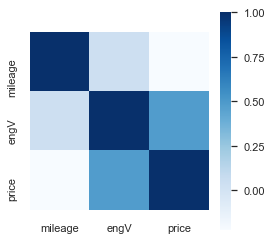

In [41]:
df=carsales[['mileage','engV','price']]
features = df.corr()
plt.figure(figsize=(4,4))
sns.heatmap(features,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

__Observation__: From the above correlation matrix, there is a high correlation between engine Volume and Pricing of the car when compared to the corelation between price and mileage.
    Cars with higher engine volume are priced more that the others.

#### 5.1.6. What are the top 10 most selling cars?

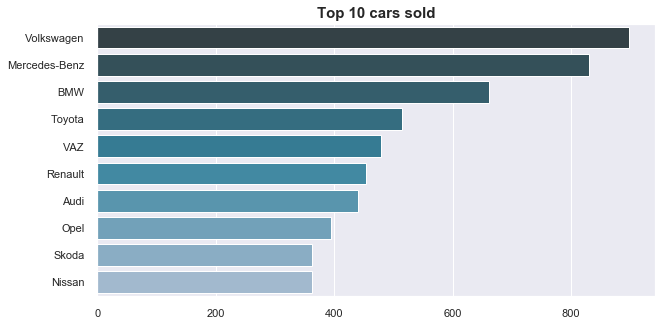

In [42]:
most_selling_cars = carsales['car'].value_counts()[:10].to_frame()
#print(most_selling_cars)
plt.figure(figsize=(10,5))
sns.barplot(most_selling_cars['car'],most_selling_cars.index,palette="PuBuGn_d")
plt.title('Top 10 cars sold',fontsize=15,fontweight="bold")
plt.xlabel('')
plt.show()


### 6. Conclusions/Inferences

The car sales dataset helps us understand that details of sales of various cars in the country of Ukraine.

We could find some interesting insights such as:

1. 2008 model cars were the ones which got sold out the most.
2. 53.5% of cars belong to the price of the cars which were below 10000.(From section 5.1.2)
3. Looks like Sedan model cars are the most preferred ones when compared to others from the fact the they have the highest number of sales count.(from section 5.1.3)
4. Petrol variants are the most sold out models in the Sedan, hatchback, crossovers.(from section 5.1.4)
5. There is a high correlation between engine Volume and Pricing of the car when compared to the corelation between price and mileage which could infer that cars with higher engine volume are priced more that the others.(from section 5.1.5)
6. Volkswagen is the top most selling car among all the cars.(from section 5.1.6)
7. Mileage depends on engine type and age of the cars.(From section 4.3 and 4.7)
8. The factors that might affect Price of the cars are drive type, engine type and body type of the cars.(From section 4.4, 4.5, 4.8)



